![](https://i.imgur.com/OWDB0jS.png)

#### ABOUT THE DATASET

##### We are living in the digital world where people started approaching towards current technologies. They make our work easy and its reliable. Online payment is one of the scenarios where people started using in recent years. Just one click! one Tap! makes our work easier and faster. As much as we know about the merits of online payment, there are fraudsters who try to loot money from people with different techniques. With the increase of online payment now-a-days, the online payment fraud has also been rising and it's actually a major concern among the people who are not aware of the current technologies.
##### To identify online payment fraud with machine learning, we need to train a machine learning model for classifying fraudulent and non-fraudulent payments. For this, we need a dataset wwhich contains information about online payment fraud, so that we can understand what type of transactions lead to fraud. For this task, I collected a dataset from Kaggle, which contains historical information about fraudulent transactions which can be used to detect fraud in online payments. Below are all the columns from the dataset I’m using here:

- step: represents a unit of time where 1 step equals 1 hour
- type: type of online transaction
- amount: the amount of the transaction
- nameOrig: customer starting the transaction
- oldbalanceOrg: balance before the transaction
- newbalanceOrig: balance after the transaction
- nameDest: recipient of the transaction
- oldbalanceDest: initial balance of recipient before the transaction
- newbalanceDest: the new balance of recipient after the transaction
- isFraud: fraud transaction

In [2]:
# Import Labraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score as ras
from xgboost import XGBClassifier



In [3]:
# Load dataset
data = pd.read_csv('onlinefraud.csv')
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB



- Categorical variables: 3
- Interger variables: 3
- Float variables: 5

In [5]:
for col in data.columns:
    missing_data = data[col].isna().sum()
    missing_percent = missing_data/len(data)*100
    print(f'Column {col} has {missing_percent}% missing data.')

Column step has 0.0% missing data.
Column type has 0.0% missing data.
Column amount has 0.0% missing data.
Column nameOrig has 0.0% missing data.
Column oldbalanceOrg has 0.0% missing data.
Column newbalanceOrig has 0.0% missing data.
Column nameDest has 0.0% missing data.
Column oldbalanceDest has 0.0% missing data.
Column newbalanceDest has 0.0% missing data.
Column isFraud has 0.0% missing data.
Column isFlaggedFraud has 0.0% missing data.


The dataset has no missing data.

In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Exploratory Data Analysis (EDA)
#### Correlating Categorical Features
- Cateogrical: type, nameOrig, nameDest, isFraud, isFlaggedFraud
- Numerical: step, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest


#### Type

In [7]:
data['type'].unique()


array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [8]:
payment_types = data['type'].value_counts()
payment_types

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

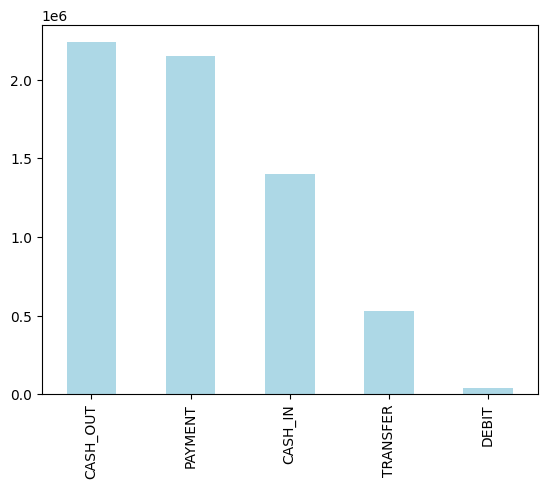

In [9]:
payment_types.plot(kind='bar', color='lightblue');

In [10]:
type = data.type.value_counts()
index = type.index
values = type.values
pie = px.pie(data, values=values, names=index, hole=0.5, title='Distribution of Transaction Type')
pie.show()

In [11]:
cross_tab = pd.crosstab(index=data['type'], columns=data['isFraud'])
cross_tab

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


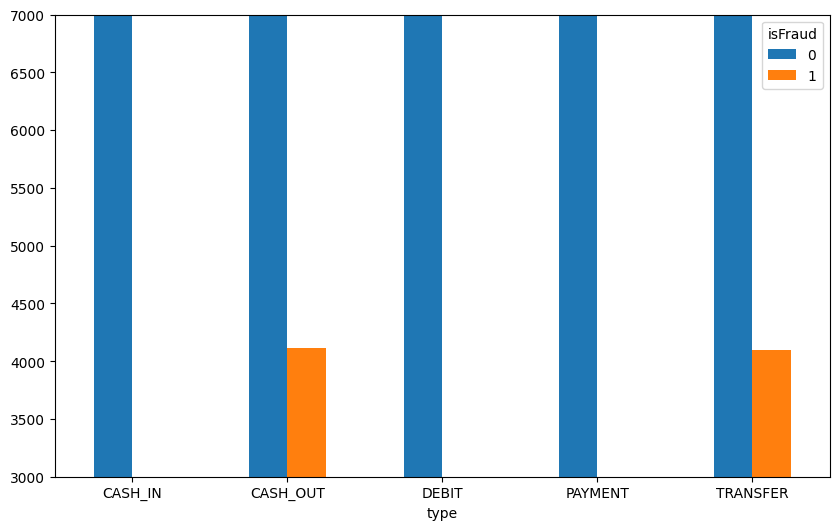

In [12]:
cross_tab.plot(kind='bar', figsize=(10, 6), rot=0)
plt.ylim([3000, 7000]);

We can see that fraud occurs mainly during transfer (4097) or cashout (4116).

#### Amount

In [13]:
print('Minimum: ', data['amount'].min())
print('Maximum: ', data['amount'].max())

Minimum:  0.0
Maximum:  92445516.64


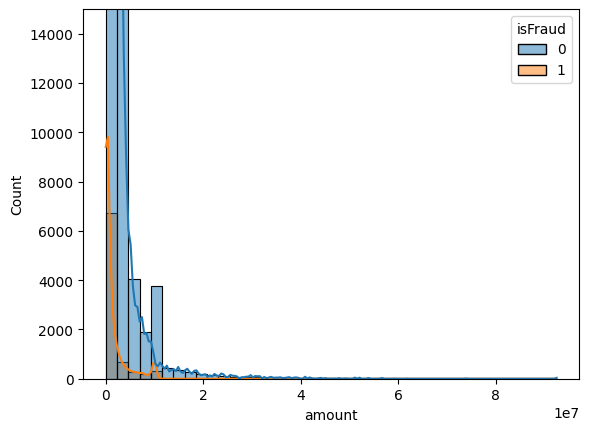

In [14]:
sns.histplot(data=data, x = 'amount', hue = 'isFraud', bins = 40, kde = True)
plt.ylim([0, 15000]);

#### Step

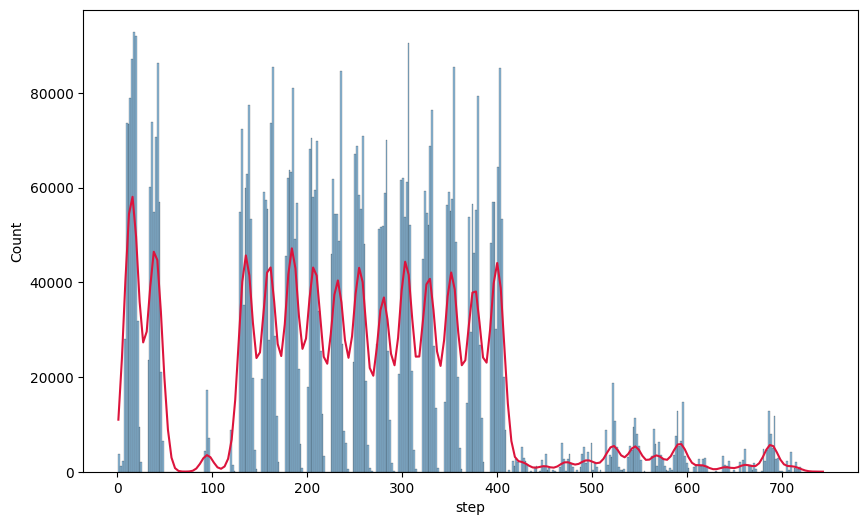

In [15]:
plt.figure(figsize = (10, 6))
ax = sns.histplot(data=data, x="step", kde=True)
ax.lines[0].set_color('crimson')

#### isFraud

In [16]:
con = data.isFraud.value_counts().to_frame()
con

,isFraud
0,6354407
1,8213


In [17]:
con = data.isFraud.value_counts()
index_con = con.index
value_con = con.values
con_pie = px.pie(data, values=value_con, names=index_con, hole=0.5, title='Distribution of Fraud and No Fraud')
con_pie.show()

- Total fraud transactions happened: 8213
- Total fraud transaction percent: 0.129%

#### isFlaggedFraud

In [18]:
data['isFlaggedFraud'].value_counts().to_frame()

,isFlaggedFraud
0,6362604
1,16


In [19]:
flagged_fraud_records = data[(data['isFraud'] == 1) & data['isFlaggedFraud'] == 1]
flagged_fraud_records.shape

(16, 11)

This denotes that all the records which were flagged as fraud were correct.

### Correlation between features

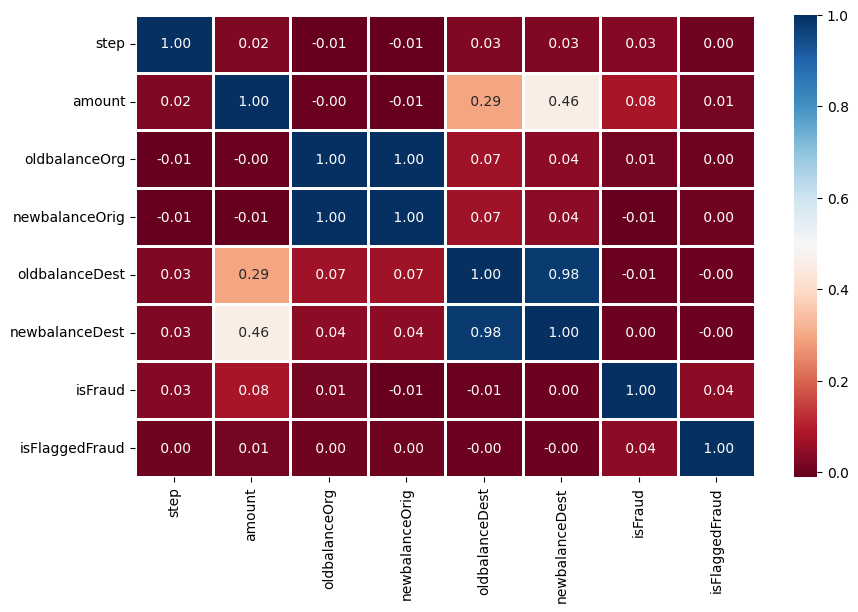

In [20]:
numerical_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_data.corr(),
            cmap='RdBu',
            fmt=' .2f',
            linewidths=1,
            annot=True);

- There is a very high correlation between newbalanceOrig and oldbalanceOrg (100%), and also between newbalanceDest and oldbalanceDest (98%) as well.
- Apart from that, we have a quite high correlation between amount and newballanceDest (46%), amount and oldbalanceDest (29%).

In [21]:
data['type'] = data['type'].map({'CASH_OUT': 1, 'PAYMENT': 2, 'CASH_IN': 3, 'TRANSFER': 4, 'DEBIT': 5})

In [22]:
X = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

In [23]:
# Training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
# Logistic Regression, XGBClassifier, Decision Tree Classifier, Random Forest Classifier
models = [LogisticRegression(), XGBClassifier(), DecisionTreeClassifier(criterion='entropy', max_depth=5), RandomForestClassifier(n_estimators=9, criterion='entropy')]

for i in range(len(models)):
    models[i].fit(X_train, y_train.ravel())
    print(f'{models[i]}: ')

    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy: ', ras(y_train, train_preds))

    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Testing Accuracy: ', ras(y_test, y_preds))
    print()


LogisticRegression(): 
Training Accuracy:  0.9815318613042991
Testing Accuracy:  0.9824222913987222

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...): 
Training Accuracy:  0.9998077469042902
Testing Accuracy:  0.9992002108317481

DecisionTreeClassifier(criterion='entropy', max_depth=5): 
Training Accuracy:  0.989101534542788
Testing Accuracy:  0.98

We can see that XGB Classifier has the best prediction, so we will use this model to predict whether the transaction is fraudulent or not.

In [25]:
# Example
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)
print(XGB_model.predict([[4, 181.00, 181.00, 0.00]]))

[1]


### Conclusion
- Fraud is less likely to happen during payment mode transfer though people are using online payment more.
- There is not much information taken from oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest and newbalanceDest columns although they had good positive correlation score.